In [1]:
import json
import requests
from bs4 import BeautifulSoup

# Load Login Credentials

In [2]:
with open('credentials.json', 'r') as f:
    credentials = json.load(f)
    username = credentials['USERNAME']
    password = credentials['PASSWORD']
    
URL = 'https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699'
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.125 Safari/537.36"}

# Start Session and Login

In [3]:
print("Getting:", URL)
s=requests.Session()
s.headers.update(headers)

r=s.get(URL)
soup=BeautifulSoup(r.content)

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data={"__VIEWSTATE":VIEWSTATE,
"__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
"__EVENTVALIDATION":EVENTVALIDATION,
"ctl00$PageContent$LoginName":username,
"ctl00$PageContent$PassWord":password,
"ctl00$PageContent$loginButton":"Log In"}

r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


# Get a history of visits

## Navigate to Usage Page

In [4]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$UsageButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open Printable View of Usage

In [5]:
#First, trigger the ability to GET

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBox":"",
        "ctl00$PageContent$toDateBox:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$usePrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [6]:
checkins = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/MemberUsageReport.aspx")

with open('Checkins.html', 'w') as w:
    w.write(checkins.text)

# Get a history of payments

## Naviate to the payment page

In [7]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$ARHistoryButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open printable view of Payments

In [8]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBoxAR":"",
        "ctl00$PageContent$toDateBoxAR:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$ARPrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [9]:
payments = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/ARHistoryReport.aspx")

with open('Payments.html', 'w') as w:
    w.write(payments.text)

# Scrape Downloaded Data

In [10]:
from datetime import datetime
import pandas as pd
import numpy as np
import calendar

#### *visits* is a series of datetime objects in sorted order (early to late) that corresponds to check-ins.

In [11]:
#Visits
with open('Checkins.html', 'r') as f:
    soup = BeautifulSoup(f)

visits = []
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==5]:
    club, _, time, _, alerts = [rec.text for rec in record.find_all('span')]
    visits.append(datetime.strptime(time, '%m/%d/%Y %I:%M:%S %p'))
        
visits = pd.Series(visits).sort_values().reset_index(drop=True)

visits.head()

0   2009-10-10 14:30:45
1   2009-10-12 18:07:58
2   2009-10-13 18:26:28
3   2009-10-17 11:35:13
4   2009-10-21 17:59:35
dtype: datetime64[ns]

#### *visits_df* is a df representation for ease of grouping

In [12]:
visits_df = pd.DataFrame()
visits_df['year'] = visits.apply(lambda dt: int(dt.strftime("%Y")))
visits_df['month'] = pd.Categorical(visits.apply(lambda dt: dt.strftime("%B")), calendar.month_name[1:])
visits_df['day'] = visits.apply(lambda dt: int(dt.strftime("%d")))
visits_df['hour'] = visits.apply(lambda dt: int(dt.strftime("%H")))
visits_df['min'] = visits.apply(lambda dt: int(dt.strftime("%M")))
visits_df['weekday'] = pd.Categorical(visits.apply(lambda dt: dt.strftime("%A")),calendar.day_name)

print(visits_df.head())
print('-'*15)
print(visits_df.dtypes)

   year    month  day  hour  min    weekday
0  2009  October   10    14   30   Saturday
1  2009  October   12    18    7     Monday
2  2009  October   13    18   26    Tuesday
3  2009  October   17    11   35   Saturday
4  2009  October   21    17   59  Wednesday
---------------
year          int64
month      category
day           int64
hour          int64
min           int64
weekday    category
dtype: object


#### *Payments* is a dataframe of payment records

In [13]:
#Payments
with open('Payments.html', 'r') as f:
    soup = BeautifulSoup(f)

payments = {'date':[],'debit':[]}
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==11]:
    info = [rec.text for rec in record.find_all('span')]
    date = info[0]
    debit = info[6]
    payments['date'].append(datetime.strptime(date, '%m/%d/%Y'))
    payments['debit'].append(float(debit))
    
payments = pd.DataFrame(payments)
payments = payments.sort_values('date').reset_index(drop=True) #Sort from earliest and re-index

print(payments.head())
print(payments.dtypes)

        date  debit
0 2009-10-10     25
1 2009-10-10     21
2 2009-11-01     29
3 2009-12-01     29
4 2010-01-01     29
date     datetime64[ns]
debit           float64
dtype: object


# Fun with data!

In [14]:
total_payments = payments['debit'].sum()
total_visits = len(visits)
print('Total Payments:', '${0:,.2f}'.format(total_payments))
print('Total Visits:', '{0:,}'.format(total_visits))
print('Average cost per visit:', "${0:,.2f}".format(total_payments/total_visits))

Total Payments: $2,221.00
Total Visits: 1,086
Average cost per visit: $2.05


In [15]:
#Most Visits per Year, Month-Year, Weekday
print("Most Visits:\n"+"-"*20)
years = visits_df.groupby('year').apply(lambda g: len(g))
print("Per Year:\t{} Visits in {}".format(years.max(), years.idxmax()))
months = visits_df.groupby(['month', 'year']).apply(lambda g: len(g))
print("Per Month:\t{} Visits in {} of {}".format(months.max(), months.idxmax()[0], months.idxmax()[1]))
weekdays = visits_df.groupby('weekday').apply(lambda g: len(g))
print("Per Weekday:\t{} Visits on {}".format(weekdays.max(), weekdays.idxmax()))

Most Visits:
--------------------
Per Year:	228 Visits in 2011
Per Month:	31 Visits in February of 2011
Per Weekday:	193 Visits on Tuesday


In [16]:
#Longest Break
timediff = visits.shift(-1)-visits #time until next visit
maxbreak = timediff.max()
start = visits.loc[timediff.idxmax()].strftime("%B %d, %Y @ %I:%M %p")
end = visits.loc[timediff.idxmax()+1].strftime("%B %d, %Y @ %I:%M %p")
print("Longest break was from {} to {}".format(start, end))
print("This was {} Days, {} Hours, {} Min, and {} Sec".format(maxbreak.days, maxbreak.seconds//3600,
                                                              maxbreak.seconds//60%60, maxbreak.seconds%60))

Longest break was from August 29, 2012 @ 06:57 PM to September 16, 2012 @ 10:58 AM
This was 17 Days, 16 Hours, 0 Min, and 54 Sec


In [17]:
def find_longest_daily_streaks(date_array):
    """Return array of (start, end) dates which give longest daily streaks"""
    #Remove duplicated, reset index
    dates = date_array.apply(lambda dt: dt.date()).drop_duplicates().reset_index(drop=True)
    
    #Run first cycle (check for consecutive date)
    delta = dates.shift(-1)-dates #days until next visit
    consecutive = (delta == pd.Timedelta('1 days')).astype(int) #"True" or "1" if separated by maxtimedelta
    cycles = 1
    
    #Run additional cycles until there are no more consecutive dates
    while consecutive.sum() >= 1:
        cycles += 1
        positions = np.where(consecutive==1)
        consecutive *= consecutive.shift(-1)
    
    #Return (start,end) date tuples with inclusive dates
    starts = [dates[p[0]] for p in positions]
    ends = [dates[p[0]+cycles-1] for p in positions] #-1 because we want inclusive range
    return [tup for tup in zip(starts, ends)]

streaks = find_longest_daily_streaks(visits)

print("Longest Streak(s): {} Days".format((streaks[0][1]-streaks[0][0]).days+1))#+1 b/c timedelta is not inclusive
for streak in streaks:
    print("From {} through {}".format(streak[0].strftime("%B %d, %Y"),
                                      streak[1].strftime("%B %d, %Y")))

Longest Streak(s): 27 Days
From March 14, 2011 through April 09, 2011


Above method took some work to figure out.

1. Get a list of unique checkin dates.
2. Get the time difference between date and next date using shift(-1)
3. Convert this array to give "1" when the next day is consecutive.
4. Repeat this process, but multiply current array by shifted array so non-consecutive zero-out
5. Stop when the next step would result in a 0 array.
6. Streaks start at remaining "1" positions and continue for the number of cycles that occurred.

There may be some edge cases that are missed by this method, but I can't think of them without more testing.

# Fun with plots!

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
%matplotlib inline

## Overview

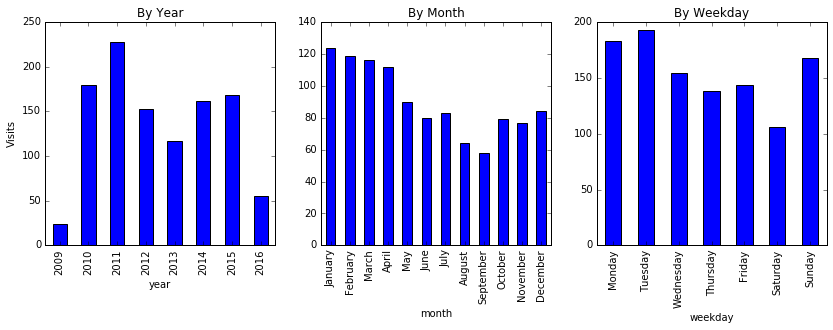

In [19]:
fig,axes = plt.subplots(1,3, figsize=(14,4))
visits_df.groupby('year').apply(lambda g: len(g)).plot(kind='bar', ax=axes[0], title='By Year')
visits_df.groupby('month').apply(lambda g: len(g)).plot(kind='bar', ax=axes[1], title='By Month')
visits_df.groupby('weekday').apply(lambda g: len(g)).plot(kind='bar', ax=axes[2], title='By Weekday')

axes[0].set_ylabel('Visits')

## Interactions

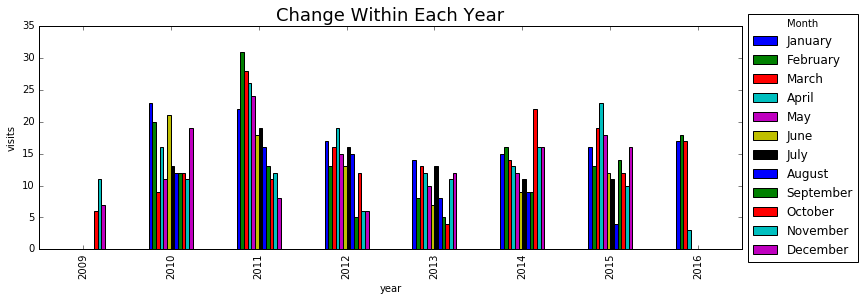

In [20]:
#Over the course of several years
fig,ax = plt.subplots(1, figsize=(14,4))
visits_df.pivot_table(index='year', columns='month', values='hour', aggfunc=len).plot(kind='bar', ax=ax)
#fix legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Month")
ax.set_title('Change Within Each Year', size=18)
ax.set_ylabel('visits')

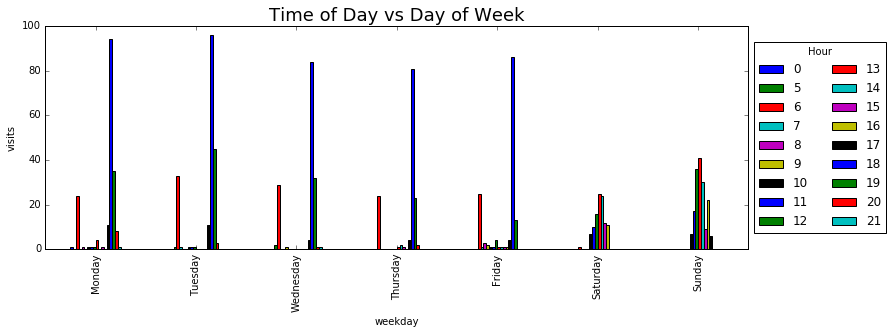

In [21]:
#Time vs Weekday
fig,ax = plt.subplots(1, figsize=(14,4))
visits_df.pivot_table(index='weekday', columns='hour', values='min', aggfunc=len).plot(kind='bar', ax=ax)
#fix legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title="Hour")
ax.set_title('Time of Day vs Day of Week', size=18)
ax.set_ylabel('visits')

In [22]:
print("Strange 12:45 at night visit?  Must be testing related.\n"+"-"*40)
print(visits_df[visits_df['hour']==0])
print("-"*40)
print(visits.loc[583])

Strange 12:45 at night visit?  Must be testing related.
----------------------------------------
     year     month  day  hour  min weekday
583  2012  December   31     0   45  Monday
----------------------------------------
2012-12-31 00:45:25


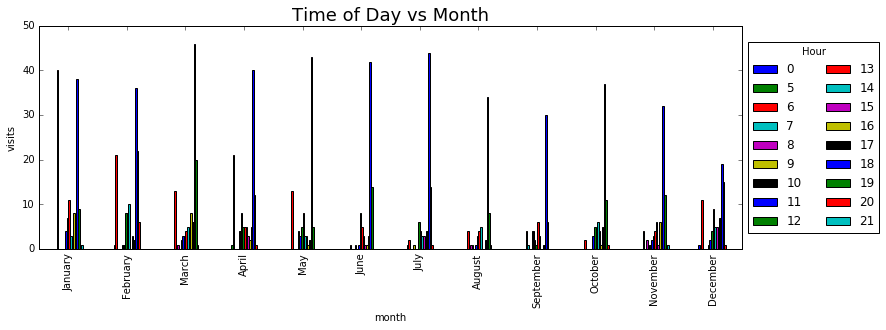

In [23]:
#Time vs Month- Trying to Avoid January Rush
fig,ax = plt.subplots(1, figsize=(14,4))
visits_df.pivot_table(index='month', columns='hour', values='min', aggfunc=len).plot(kind='bar', ax=ax)
#fix legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title='Hour')
ax.set_title('Time of Day vs Month', size=18)
ax.set_ylabel('visits')